In [5]:
!pip install pandas pyarrow huggingface_hub fsspec


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [6]:
import pandas as pd

In [7]:
df = pd.read_parquet(
    "hf://datasets/baobaoh/13-dimensions-music-emotions/data/train-00000-of-00001.parquet")

In [9]:
df.head()

,audio,amusing,angry,annoying,anxious/tense,awe-inspiring/amazing,beautiful,bittersweet,calm/relaxing/serene,compassionate/sympathetic,...,joyful/cheerful,nauseating/revolting,painful,proud/strong,romantic/loving,sad/depressing,scary/fearful,tender/longing,transcendent/mystical,triumphant/heroic
0,{'bytes': b'ID3\x03\x00\x00\x00\x00\x02GTALB\x...,0.055556,0.00000,0.11111,0.055556,0.111110,0.277780,0.055556,0.500000,0.22222,...,0.055556,0.000000,0.00000,0.00000,0.111110,0.055556,0.00000,0.11111,0.055556,0.00000
1,{'bytes': b'ID3\x04\x00\x00\x00\x00\x01\x00TXX...,0.055556,0.00000,0.16667,0.222220,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.055556,0.11111,0.33333,0.000000,0.000000,0.11111,0.00000,0.000000,0.11111
2,{'bytes': b'ID3\x04\x00\x00\x00\x00\x01\x00TXX...,0.000000,0.22222,0.22222,0.166670,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.055556,0.111110,0.22222,0.33333,0.000000,0.000000,0.22222,0.00000,0.000000,0.16667
3,{'bytes': b'ID3\x04\x00\x00\x00\x00\x01\x00TXX...,0.111110,0.00000,0.00000,0.111110,0.111110,0.166670,0.000000,0.166670,0.00000,...,0.000000,0.055556,0.00000,0.00000,0.055556,0.000000,0.00000,0.00000,0.000000,0.00000
4,{'bytes': b'ID3\x04\x00\x00\x00\x00\x01\x00TXX...,0.111110,0.00000,0.16667,0.000000,0.055556,0.055556,0.000000,0.055556,0.11111,...,0.222220,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000,0.166670,0.00000


In [17]:
df.loc[0][0]

/var/folders/nz/39gp4zhs7mx5ymbxb1f58nmw0000gn/T/ipykernel_94496/2527876973.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.loc[0][0]


{'bytes': b'ID3\x03\x00\x00\x00\x00\x02GTALB\x00\x00\x00\x14\x00\x00\x00Tree Dance - SingleTIT2\x00\x00\x00\x0b\x00\x00\x00Tree DanceTXXX\x00\x00\x00\x12\x00\x00\x00Part of a set\x001/1TRCK\x00\x00\x00\x04\x00\x00\x001/1COMM\x00\x00\x00"\x00\x00\x00\x00\x00\x00\x00Amazon.com Song ID: 235304518COMM\x00\x00\x00"\x00\x00\x00XXX\x00Amazon.com Song ID: 235304518TXXX\x00\x00\x00\'\x00\x00\x00Copyright message\x00(c) 2013 David CowenTPE1\x00\x00\x00\x0c\x00\x00\x00David CowenTYER\x00\x00\x00\x05\x00\x00\x002013TDRC\x00\x00\x00\x05\x00\x00\x002013TXXX\x00\x00\x00\x11\x00\x00\x00Band\x00David CowenTCON\x00\x00\x00\x08\x00\x00\x00New Age\xff\xfb\x90d\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00Xing\x00\x00\x00\x0f\x00\x00\x00\xc5\x00\x02(\xf7\x00\x02\x04\x06\n\x0c\x0e\x10\x13\x15\x17\x1a\x1d "$\')+/1468;>ADGILOQTUX[]_bdgjnpruxz}\x80\x83\x85\x87\x8a\x8d\x90\x92\x95\x98\x9a\x9d\xa0\xa3\xa5\xa9\xab\xad\xaf\xb1\xb4\xb

# Extract the MP3 metadata

In [45]:
!pip install mutagen pydub pyaudio

  Using cached PyAudio-0.2.14-cp311-cp311-macosx_14_0_arm64.whl

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [40]:
from mutagen.mp3 import MP3
from mutagen.id3 import ID3, TPE1, TIT2, TALB, TYER, TRCK, COMM, TCON
import io

In [41]:
df.iloc[0][0]['bytes']

/var/folders/nz/39gp4zhs7mx5ymbxb1f58nmw0000gn/T/ipykernel_94496/149075923.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.iloc[0][0]['bytes']


b'ID3\x03\x00\x00\x00\x00\x02GTALB\x00\x00\x00\x14\x00\x00\x00Tree Dance - SingleTIT2\x00\x00\x00\x0b\x00\x00\x00Tree DanceTXXX\x00\x00\x00\x12\x00\x00\x00Part of a set\x001/1TRCK\x00\x00\x00\x04\x00\x00\x001/1COMM\x00\x00\x00"\x00\x00\x00\x00\x00\x00\x00Amazon.com Song ID: 235304518COMM\x00\x00\x00"\x00\x00\x00XXX\x00Amazon.com Song ID: 235304518TXXX\x00\x00\x00\'\x00\x00\x00Copyright message\x00(c) 2013 David CowenTPE1\x00\x00\x00\x0c\x00\x00\x00David CowenTYER\x00\x00\x00\x05\x00\x00\x002013TDRC\x00\x00\x00\x05\x00\x00\x002013TXXX\x00\x00\x00\x11\x00\x00\x00Band\x00David CowenTCON\x00\x00\x00\x08\x00\x00\x00New Age\xff\xfb\x90d\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00Xing\x00\x00\x00\x0f\x00\x00\x00\xc5\x00\x02(\xf7\x00\x02\x04\x06\n\x0c\x0e\x10\x13\x15\x17\x1a\x1d "$\')+/1468;>ADGILOQTUX[]_bdgjnpruxz}\x80\x83\x85\x87\x8a\x8d\x90\x92\x95\x98\x9a\x9d\xa0\xa3\xa5\xa9\xab\xad\xaf\xb1\xb4\xb7\xb9\xbc\

In [42]:
def extract_metadata_from_bytes(mp3_bytes):
    try:
        # Create an in-memory file from bytes
        mp3_buffer = io.BytesIO(mp3_bytes)

        # Load MP3 file from bytes
        audio = MP3(mp3_buffer, ID3=ID3)

        # Extract ID3 metadata
        metadata = {
            "Title": audio.tags.get("TIT2", "Unknown").text[0] if "TIT2" in audio.tags else "Unknown",
            "Artist": audio.tags.get("TPE1", "Unknown").text[0] if "TPE1" in audio.tags else "Unknown",
            "Album": audio.tags.get("TALB", "Unknown").text[0] if "TALB" in audio.tags else "Unknown",
            "Year": audio.tags.get("TYER", "Unknown").text[0] if "TYER" in audio.tags else "Unknown",
            "Track Number": audio.tags.get("TRCK", "Unknown").text[0] if "TRCK" in audio.tags else "Unknown",
            "Genre": audio.tags.get("TCON", "Unknown").text[0] if "TCON" in audio.tags else "Unknown",
            "Comment": audio.tags.get("COMM::'eng'", "Unknown").text[0] if "COMM::'eng'" in audio.tags else "Unknown",
        }

        # Print metadata
        print("Extracted Metadata:")
        for key, value in metadata.items():
            print(f"{key}: {value}")

        return metadata

    except Exception as e:
        print(f"Error reading MP3 data: {e}")
        return None


In [44]:
extract_metadata_from_bytes(df.iloc[0][0]['bytes'])

Extracted Metadata:
Title: Tree Dance
Artist: David Cowen
Album: Tree Dance - Single
Year: Unknown
Track Number: 1/1
Genre: New Age
Comment: Unknown


/var/folders/nz/39gp4zhs7mx5ymbxb1f58nmw0000gn/T/ipykernel_94496/2389146405.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  extract_metadata_from_bytes(df.iloc[0][0]['bytes'])


{'Title': 'Tree Dance',
 'Artist': 'David Cowen',
 'Album': 'Tree Dance - Single',
 'Year': 'Unknown',
 'Track Number': '1/1',
 'Genre': 'New Age',
 'Comment': 'Unknown'}

## Extract audio file and play it

In [118]:
import io
import pyaudio
from pydub import AudioSegment

def play_mp3_from_bytes(mp3_bytes):
    try:
        # Convert MP3 bytes to an AudioSegment
        audio = AudioSegment.from_file(io.BytesIO(mp3_bytes), format="mp3")

        # Convert audio to raw PCM format
        raw_data = audio.raw_data
        sample_width = audio.sample_width
        channels = audio.channels
        frame_rate = audio.frame_rate

        # Set up PyAudio for playback
        p = pyaudio.PyAudio()
        stream = p.open(format=p.get_format_from_width(sample_width),
                        channels=channels,
                        rate=frame_rate,
                        output=True)

        # Play audio
        print("Playing audio...")
        stream.write(raw_data)

        # Cleanup
        stream.stop_stream()
        stream.close()
        p.terminate()
        print("Playback finished.")

    except Exception as e:
        print(f"Error playing MP3: {e}")

In [120]:
play_mp3_from_bytes(df.iloc[0][0]['bytes'])

/var/folders/nz/39gp4zhs7mx5ymbxb1f58nmw0000gn/T/ipykernel_94496/2978724286.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  play_mp3_from_bytes(df.iloc[0][0]['bytes'])


Playing audio...
Playback finished.


# Do Pitch Detection Algorithm

In [129]:
!pip install praat-parselmouth
!pip install numpy matplotlib seaborn
!pip install pydub



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [131]:
import parselmouth

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from pydub import AudioSegment

def convert_mp3_bytes_to_wav(mp3_bytes, output_wav_path):
    # Convert byte data into an in-memory file object
    mp3_buffer = io.BytesIO(mp3_bytes)
    
    # Read the MP3 file from memory
    audio = AudioSegment.from_file(mp3_buffer, format="mp3")
    
    # Export to WAV format
    audio.export(output_wav_path, format="wav")
    print(f"Conversion successful! WAV file saved to: {output_wav_path}")

In [132]:
convert_mp3_bytes_to_wav(df.iloc[0][0]['bytes'], 'output.wav')

/var/folders/nz/39gp4zhs7mx5ymbxb1f58nmw0000gn/T/ipykernel_94496/1635930906.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  convert_mp3_bytes_to_wav(df.iloc[0][0]['bytes'], 'output.wav')


Conversion successful! WAV file saved to: output.wav


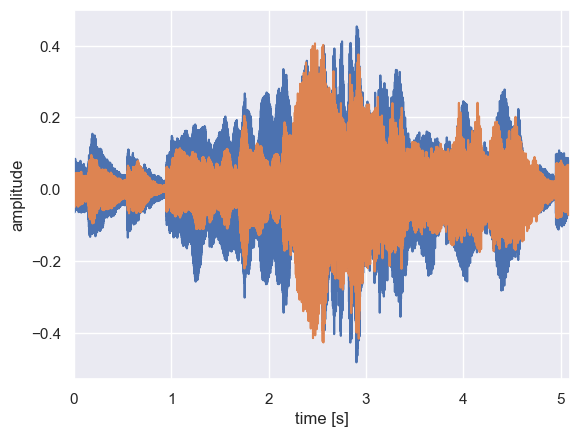

In [134]:
sns.set() # Use seaborn's default style to make attractive graphs

# Plot nice figures using Python's "standard" matplotlib library
snd = parselmouth.Sound('output.wav')
plt.figure()
plt.plot(snd.xs(), snd.values.T)
plt.xlim([snd.xmin, snd.xmax])
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.show() # or plt.savefig("sound.png"), or plt.savefig("sound.pdf")